In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# Hyper parameters
batch_size = 128
nb_epoch = 10

encoding_dim = 784
decoding_dim = 784
nb_hidden = 32



In [2]:
# Load MNIST Dataset
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(60000, encoding_dim)
X_test = X_test.reshape(10000, encoding_dim)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# Build autoencoder model
input_vec = Input(shape=(encoding_dim,))
encoded = Dense(activation='relu', units=nb_hidden)(input_vec)
decoded = Dense(decoding_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_vec, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Train
autoencoder.fit(X_train, X_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_split = 0.2)

Epoch 1/10
 31/375 [=>............................] - ETA: 0s - loss: 0.5544 

2025-01-23 22:14:14.015709: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 1s 2ms/step - loss: 0.2438 - val_loss: 0.1710
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1531 - val_loss: 0.1380
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1290 - val_loss: 0.1211
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1158 - val_loss: 0.1113
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1078 - val_loss: 0.1050
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1025 - val_loss: 0.1011
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0990 - val_loss: 0.0983
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0967 - val_loss: 0.0968
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0955 - val_loss: 0.0958
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0948 - val_loss: 0.0954


In [5]:
# Evaluate
evaluation = autoencoder.evaluate(X_test, X_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 1ms/step - loss: 0.0934

Summary: Loss over the test dataset: 0.09


313/313 [==============================] - 0s 402us/step


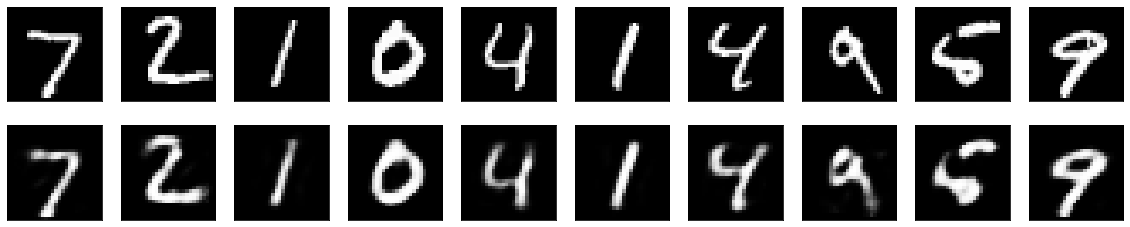

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_vec = autoencoder.predict(X_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_vec[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()